In [107]:
#Victor Silva de Oliveira
#Yago Barros Barbosa

from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

import requests


In [70]:
# setup security 
access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

# setup file store
file = 'C:/Users/Wed-Gaby/Desktop/Pós Graduação/Recuperação de dados da Web/1 - Twitter - Futebol/tweets-sample-1.json'

In [71]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [95]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 15 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['neymar', 'lukaku', 'messi', 'modric', 'mbappe','pogba','rakitic','cr7','hazard', 'kante', 'kane'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [60]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [97]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   fr  RT @Footballogue: [#CM2018] Mbappe🇫🇷: « Descha...    None
1   pt  RT @planetadabolabr: O Real Madrid emitiu uma ...    None
2   en  @RobWoodfin1 Agree with that. But for £57m I’d...    None
3   en  RT @Matt_Law_DT: I’ve just asked someone who w...    None
4   pt  RT @claudioedantas: Neymar é humano, já os bot...    None
5   en  RT @Pigmatron_: @Faitelson_ESPN @gary1838 VAR ...    None
6   en  @chelsea_realist Imagine the freedom hazard wi...    None
7   en  RT @Ultra_Suristic: HOLY SH*T! A filmmaker who...    None
8   es  RT @piquefilia: "No hay debate"...dos Caras pi...    None
9   es  RT @Manu_Sainz: Me parece lamentable q Barça y...    None


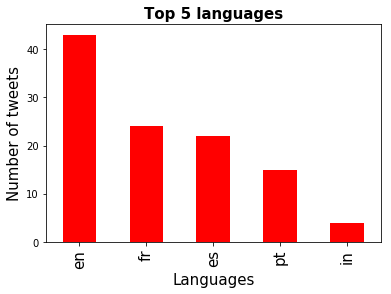

In [98]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

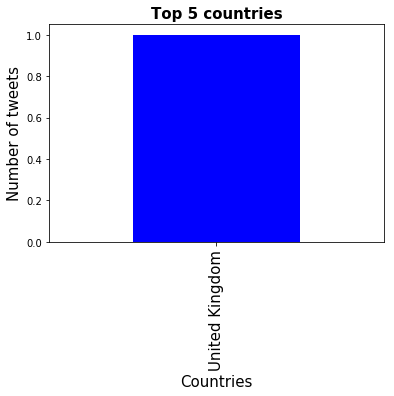

In [99]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [100]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [101]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('neymar', tweet['text']):
            players.append('neymar')
        elif word_in_text('messi', tweet['text']):
            players.append('messi')
        elif word_in_text('lukaku', tweet['text']):
            players.append('lukaku')
        elif word_in_text('modric', tweet['text']):
            players.append('modric')
        elif word_in_text('hazard', tweet['text']):
            players.append('hazard')
        elif word_in_text('mbappe', tweet['text']):
            players.append('mbappe')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('pogba', tweet['text']):
            players.append('pogba')
        elif word_in_text('rakitic', tweet['text']):
            players.append('rakitic')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('kante', tweet['text']):
            players.append('kante')
        elif word_in_text('kane', tweet['text']):
            players.append('kane')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,fr,RT @Footballogue: [#CM2018] Mbappe🇫🇷: « Descha...,None,mbappe
1,pt,RT @planetadabolabr: O Real Madrid emitiu uma ...,None,neymar
2,en,@RobWoodfin1 Agree with that. But for £57m I’d...,None,kante
3,en,RT @Matt_Law_DT: I’ve just asked someone who w...,None,None
4,pt,"RT @claudioedantas: Neymar é humano, já os bot...",None,neymar
5,en,RT @Pigmatron_: @Faitelson_ESPN @gary1838 VAR ...,None,neymar
6,en,@chelsea_realist Imagine the freedom hazard wi...,None,hazard
7,en,RT @Ultra_Suristic: HOLY SH*T! A filmmaker who...,None,modric
8,es,"RT @piquefilia: ""No hay debate""...dos Caras pi...",None,None
9,es,RT @Manu_Sainz: Me parece lamentable q Barça y...,None,neymar


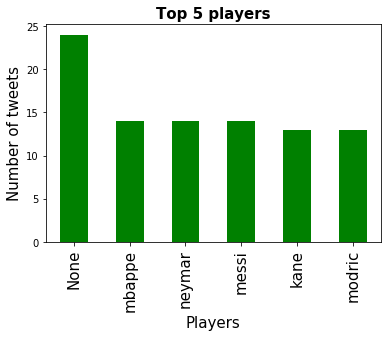

In [102]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')

In [106]:
# Desafio: filtrando pelas coordenadas geográficas os tweets em português
for tweet in tweets_data:
    if tweet['lang'] == 'pt':
        print(tweet['user']['location'])
        print(tweet['coordinates'])
        #for user in tweet['user']:
        #    print(user)

        #print(tweet['user'])
##tweets_data

None
None
Brasil
None
Brasil
None
Wonderland
None
Anápolis, Brasil
None
Oswaldo Cruz , RJ/Brasil
None
Rio de Janeiro, Brasil
None
None
None
Condeixa-a-Nova, Portugal
None
None
None
Huechuraba
None
BRASIL
None
Brasil
None
grêmio
None
Jaguaraçu, Brasil
None


In [146]:
# Using Python requests and the Google Maps Geocoding API.
#
# References:
#
# * http://docs.python-requests.org/en/latest/
# * https://developers.google.com/maps/

GOOGLE_MAPS_API_URL = 'http://maps.googleapis.com/maps/api/geocode/json?address='
for tweet in tweets_data:
    if tweet['lang'] == 'pt':
        print(tweet['user']['location'])
        if tweet['user']['location'] is not None :
            #print('oi')
#            time.sleep(1)
#            params = {                'address': tweet['user']['location'],                'sensor': 'false'            }

            # Do the request and get the response data
            req = requests.get(GOOGLE_MAPS_API_URL+tweet['user']['location'])
            #print(req)
            res = req.json()
            try:
                # Use the first result
                result = res['results'][0]

                geodata = dict()
                geodata['lat'] = result['geometry']['location']['lat']
                geodata['lng'] = result['geometry']['location']['lng']
                #geodata['address'] = result['formatted_address']

                print('({lat}, {lng})'.format(**geodata))
                # 221B Baker Street, London, Greater London NW1 6XE, UK. (lat, lng) = (51.5237038, -0.1585531)
            except:
                print('Erro')

None
Brasil
(-14.235004, -51.92528)
Brasil
Erro
Wonderland
Erro
Anápolis, Brasil
Erro
Oswaldo Cruz , RJ/Brasil
(-22.8749746, -43.351177)
Rio de Janeiro, Brasil
(-22.9068467, -43.1728965)
None
Condeixa-a-Nova, Portugal
Erro
None
Huechuraba
(-33.3742128, -70.6367425)
BRASIL
(-14.235004, -51.92528)
Brasil
Erro
grêmio
Erro
Jaguaraçu, Brasil
Erro
